# Loading Data
### DataSet link: https://docs.google.com/spreadsheets/d/1AhDUFItDC3LPah6M-QDpefe8EpM-zG_T2bf5wMT3yos/edit#gid=0

In [1]:
import pandas as pd

data = pd.read_csv('E:\DataSet.csv')
#data.head()
#data.info()
#data

# TF-IDF (Feature Extraction)
### Source of tf-idf: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
#unicode
documents = data['Content'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)
features

<29x430 sparse matrix of type '<class 'numpy.float64'>'
	with 894 stored elements in Compressed Sparse Row format>

# Clustering
### Source of clustering: https://www.youtube.com/watch?v=ORpDAUQUnkU

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, init = 'k-means++', max_iter = 10, n_init = 1)
model.fit(features)

data['Cluster'] = model.labels_
data

,ID,Title,Content,Cluster
0,4.0,Punishment for crimes committed by substance s...,if any person kills or attempts to cause the d...,1
1,7.0,Punishment for abduction if wimen and children,If any person 1 [ Human Trafficking Prevention...,1
2,8.0,Punishment for ransom,If a person detains a woman or a child for ran...,1
3,9.1,Punishment for rapem death due to rape,"If a man rapes a woman or a child, he shall be...",1
4,9.2,Punishment for inciting women to commit suicide,If a woman commits suicide without the consent...,1
5,10.0,Penalties for sexual harassment,If a person unlawfully touches or molestes a w...,1
6,11.0,Punishment of death for dowry,"If a woman's husband or husband's father, moth...",3
7,12.0,Punishment of mutilation of a child for the pu...,If a person destroys or mutilates or mutilates...,3
8,13.0,Provisions regarding children born as a result...,Notwithstanding anything different from any ot...,1
9,14.0,Prohibition on disclosure of identity of abuse...,News or information or name-address or other i...,1


# Printing top 10 features of the clusters

In [5]:
print("Cluster Centraoids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(4):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])
    print('-------------')

Cluster Centraoids: 

Cluster 0:
 gaming
 offence
 liable
 exceeding
 playing
 shall
 punishment
 subsequent
 double
 house
-------------
Cluster 1:
 person
 woman
 child
 shall
 act
 section
 offense
 imprisonment
 exceeding
 years
-------------
Cluster 2:
 drug
 warranty
 extend
 false
 report
 true
 believe
 government
 respect
 security
-------------
Cluster 3:
 extend
 section
 convicted
 imprisonment
 punishable
 shall
 fine
 person
 penalty
 rule
-------------


# Pie chart of the result

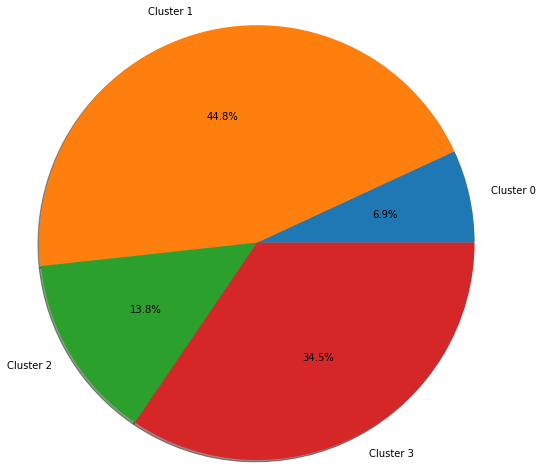

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

exp_vals = [2, 13, 4, 10]
exp_labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%', radius=2.5)
#plt.axis("equal")
plt.show()